In [13]:
import __init__
import os
import ast  # for safely evaluating string representations of lists
from utils import comp_metrics, get_callbacks
from pathlib import Path
import tensorflow as tf
from data import load_data_with_sent
from utils import comp_metrics,describe_model_architecture
import numpy as np
import json

In [14]:
version = 'v4'
dir_path = '.'
data_path = str(Path(dir_path) /  'input/stocks_step4.csv')
output_path = str(Path(dir_path) /  f'output/{version}')
model_path = str(Path(output_path) /  'model')

In [15]:
# Daten laden
_, _, testd = load_data_with_sent(data_path, window_size=30)

In [16]:
# Load the saved model
loaded_model = tf.keras.models.load_model(model_path)

In [17]:
# Print layer details
print(json.dumps(describe_model_architecture(loaded_model), indent=2))

[
  {
    "name": "cnn_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_1",
    "type": "Conv1D"
  },
  {
    "name": "dropout_5",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "cnn_layer_2",
    "type": "Conv1D"
  },
  {
    "name": "dropout_6",
    "type": "Dropout",
    "dropout_rate": 0.1
  },
  {
    "name": "lstm_input",
    "type": "InputLayer"
  },
  {
    "name": "cnn_layer_3",
    "type": "Conv1D"
  },
  {
    "name": "lstm_1",
    "type": "LSTM",
    "units": 40
  },
  {
    "name": "dropout_7",
    "type": "Dropout",
    "dropout_rate": 0.2
  },
  {
    "name": "dropout_4",
    "type": "Dropout",
    "dropout_rate": 0.1
  },
  {
    "name": "flatten_1",
    "type": "Flatten"
  },
  {
    "name": "concatenate_1",
    "type": "Concatenate"
  },
  {
    "name": "dense_2",
    "type": "Dense",
    "units": 64
  },
  {
    "name": "dense_3",
    "type": "Dense",
    "units": 1
  }
]


Predicting AAPL...
Metrics for AAPL
Mean Absolute Error (MAE): 1.4909929037094116
Mean Squared Error (MSE): 3.8619842529296875
Mean Absolute Percentage Error (MAPE): 1.46%


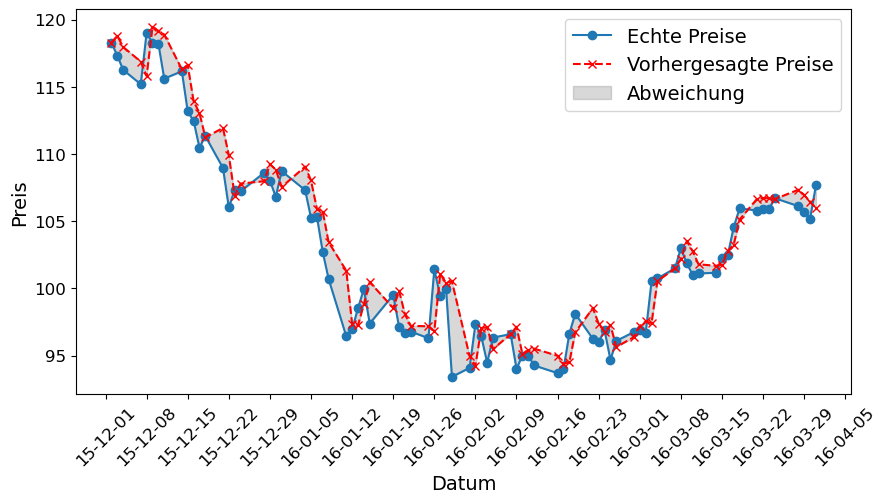

Predicting AMZN...
Metrics for AMZN
Mean Absolute Error (MAE): 10.425395011901855
Mean Squared Error (MSE): 236.35903930664062
Mean Absolute Percentage Error (MAPE): 1.77%


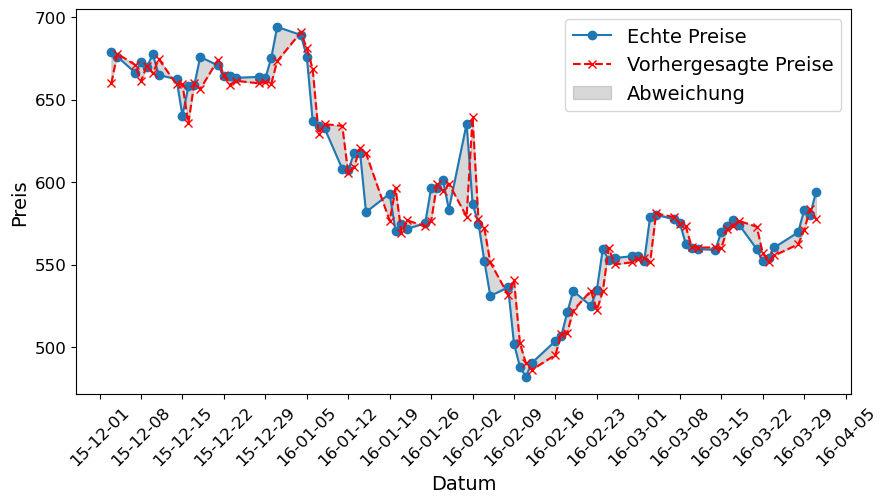

Predicting BABA...
Metrics for BABA
Mean Absolute Error (MAE): 1.2377755641937256
Mean Squared Error (MSE): 2.4810571670532227
Mean Absolute Percentage Error (MAPE): 1.81%


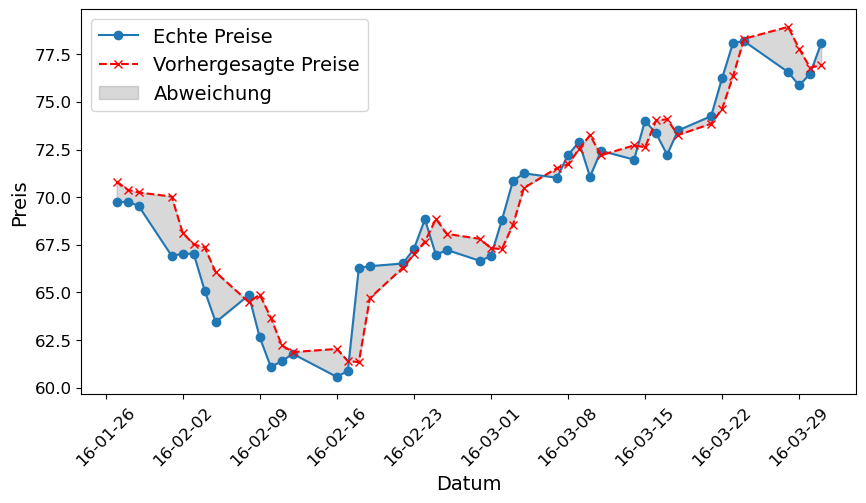

Predicting CSCO...
Metrics for CSCO
Mean Absolute Error (MAE): 0.36631298065185547
Mean Squared Error (MSE): 0.2361922264099121
Mean Absolute Percentage Error (MAPE): 1.44%


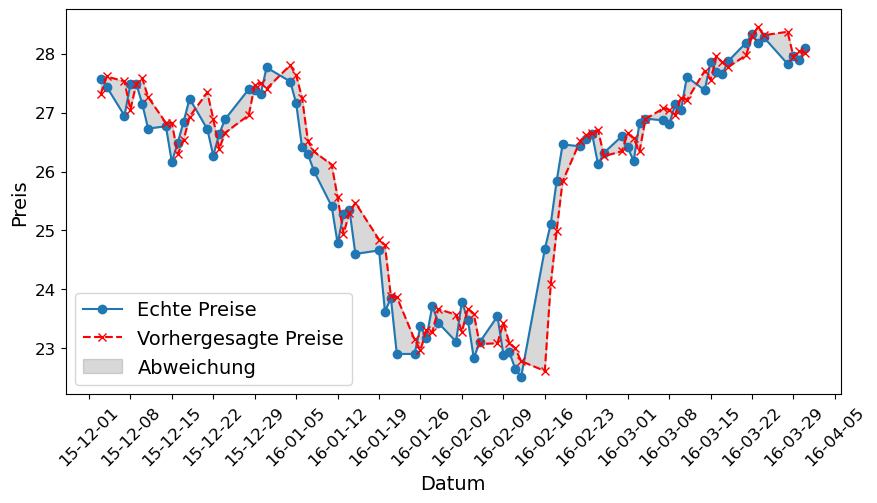

Predicting FB...
Metrics for FB
Mean Absolute Error (MAE): 1.6373589038848877
Mean Squared Error (MSE): 6.33740758895874
Mean Absolute Percentage Error (MAPE): 1.57%


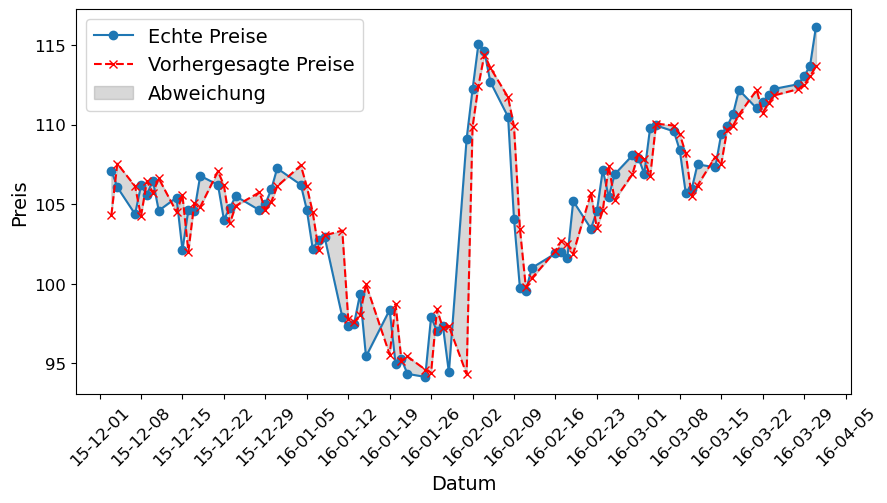

Predicting GOOG...
Metrics for GOOG
Mean Absolute Error (MAE): 8.966415405273438
Mean Squared Error (MSE): 137.7202911376953
Mean Absolute Percentage Error (MAPE): 1.24%


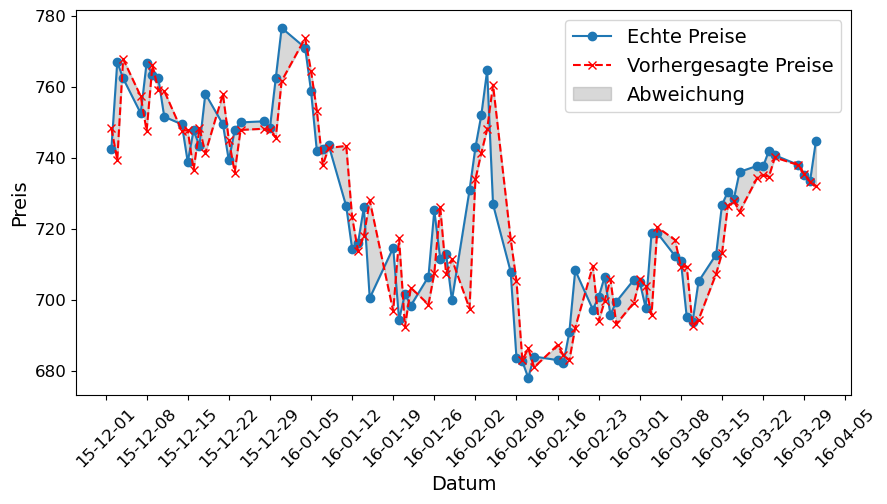

Predicting INTC...
Metrics for INTC
Mean Absolute Error (MAE): 0.4290010929107666
Mean Squared Error (MSE): 0.35910263657569885
Mean Absolute Percentage Error (MAPE): 1.36%


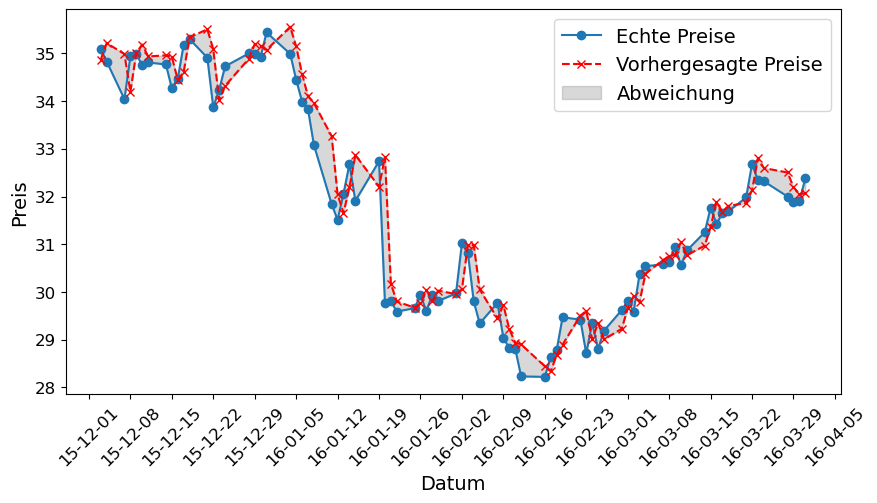

Predicting MSFT...
Metrics for MSFT
Mean Absolute Error (MAE): 0.7328380942344666
Mean Squared Error (MSE): 0.864666223526001
Mean Absolute Percentage Error (MAPE): 1.38%


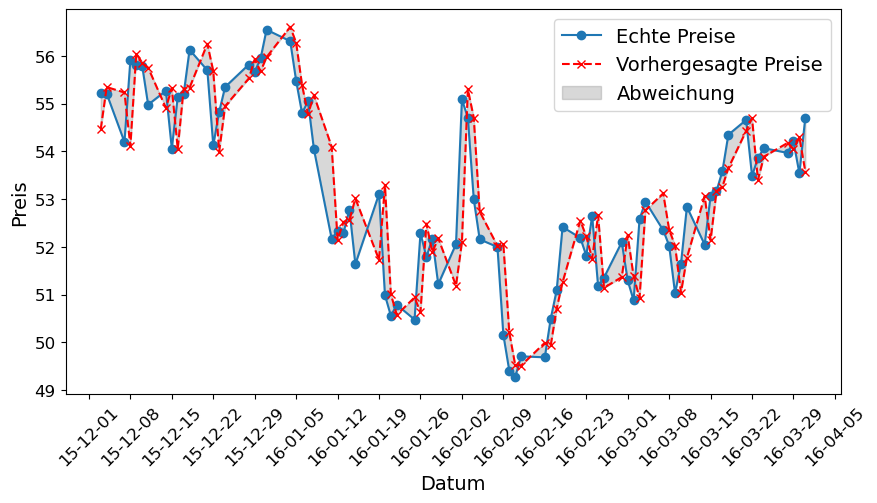

Predicting ORCL...
Metrics for ORCL
Mean Absolute Error (MAE): 0.4733341932296753
Mean Squared Error (MSE): 0.3618171811103821
Mean Absolute Percentage Error (MAPE): 1.28%


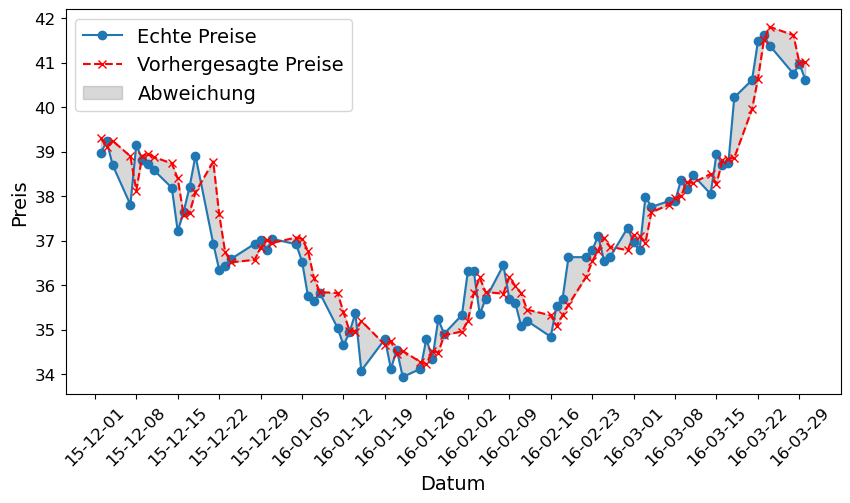

Predicting TSM...
Metrics for TSM
Mean Absolute Error (MAE): 0.2816835939884186
Mean Squared Error (MSE): 0.14163528382778168
Mean Absolute Percentage Error (MAPE): 1.23%


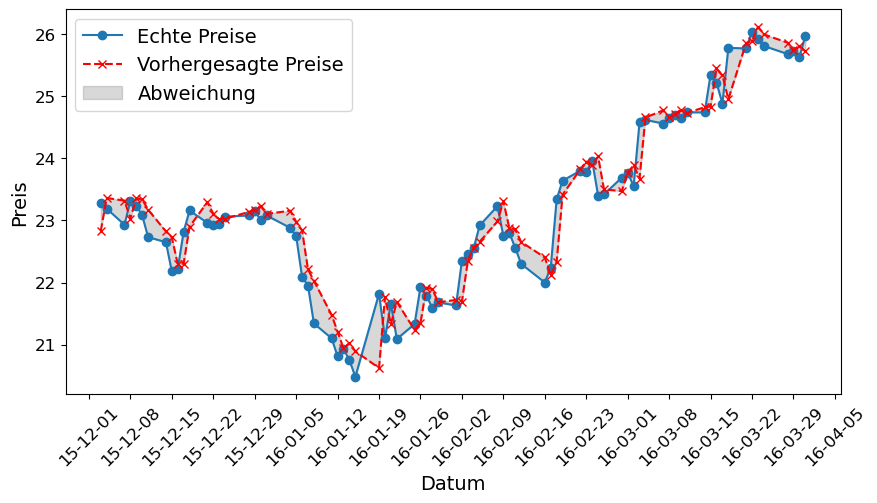

In [18]:
for i in range(len(testd)):
    stock_testd = testd[i]
    scaler = stock_testd['scaler']
    stock_name = stock_testd['stock']
    df = stock_testd['df']
    
    X = []
    y = []
    for i in range(len(stock_testd['test_data'])):
        data = stock_testd['test_data'][i]
        X.append(data[0])
        y.append(data[1])
        
    X = np.array(X)
    X_nums = X[:,:, :1]
    X_sent = X[:,:10, 1:]
    y = np.array(y)
    
    print(f'Predicting {stock_name}...')
    y_pred = loaded_model.predict([X_nums, X_sent])
    print(f'Metrics for {stock_name}')
    comp_metrics(scaler, y, y_pred, df)